In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import cv2 as cv
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


%matplotlib inline

/home/harsh/.local/lib/python3.9/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


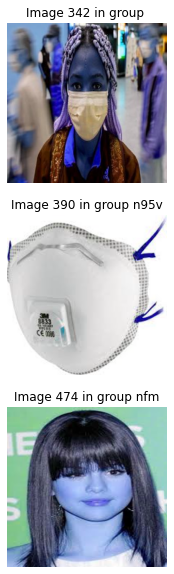

In [2]:
def show_images_in_groups(path):
    # Creating a dict to store the images for each group
    images_by_group = {}

    for path in paths:
        group_name = os.path.basename(path)
        images = []

        for image_filename in os.listdir(path):
            image = cv.imread(os.path.join(path, image_filename))
            images.append(image)

        images_by_group[group_name] = images

    # creating a image and subplots for each groupings
    fig, axes = plt.subplots(len(images_by_group), 1, figsize=(10, 10))
 
    
    for i, (group_name, images) in enumerate(images_by_group.items()):
        ax = axes[i]

        # creating a subplot for each image
        for j, image in enumerate(images):
            ax.imshow(image)
            ax.set_title(f'Image {j + 1} in group {group_name}')
            ax.axis('off')

        # adjusting the layout of the subplots
#         plt.tight_layout()

    # showing the figure
    plt.show()

paths = ['train/cloth/', 'train/n95/', 'train/n95v' , 'train/nfm', 'train/srg/']

# Showing the images in groups
show_images_in_groups(paths)

In [7]:
data_path = "train/"
categories = os.listdir(data_path)
labels = []
images = []

for category in categories:
    folder_path = os.path.join(data_path, category)
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = cv.imread(img_path)
        img = cv.resize(img, (100, 100))  # Resize images to a consistent size
        images.append(img)
        labels.append(category)

# Convert images and labels to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Flatten the images
images_flatten = images.reshape(images.shape[0], -1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images_flatten, labels, test_size=0.2, random_state=42)

# Create and train the KNN model
k = 1  # You can adjust this parameter
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# You can now use this trained model to make predictions on new images
# new_image_path = "test/"
# new_img = cv.imread(new_image_path)
# new_img = cv.resize(new_img, (100, 100))
# new_img_flatten = new_img.reshape(1, -1)
# prediction = knn_model.predict(new_img_flatten)
# print(f"Prediction: {prediction}")

Accuracy: 0.5688775510204082


In [8]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# Load images and labels
data_path = "train/"
categories = os.listdir(data_path)
labels = []
images = []

# Load MobileNetV2 model for feature extraction
mobilenet_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(100, 100, 3))

for category in categories:
    folder_path = os.path.join(data_path, category)
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (100, 100))
        img = preprocess_input(img)  # Preprocess image for MobileNetV2
        img = np.expand_dims(img, axis=0)  # Add batch dimension
        features = mobilenet_model.predict(img)
        images.append(features.flatten())
        labels.append(category)

# Convert images and labels to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Create and train the KNN model
k = 15
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 23ms/step
Accuracy: 0.6020408163265306


In [34]:
import cv2
import numpy as np
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# Load the trained KNN model
# Make sure to replace "/path/to/your/model.pkl" with the actual path to your saved model
knn_model_path = "knn_model.pkl"
knn_model = joblib.load(knn_model_path)

# Load MobileNetV2 model for feature extraction
mobilenet_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(100, 100, 3))

# Function to preprocess and predict the class of a new image
def predict_class(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (100, 100))
    img = preprocess_input(img)  # Preprocess image for MobileNetV2
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    features = mobilenet_model.predict(img)
    flattened_features = features.flatten()
    prediction = knn_model.predict([flattened_features])
    return prediction[0]

# Test the model on a new image
new_image_path = "test/n95/355.jpg"
predicted_class = predict_class(new_image_path)
print(f"Predicted Class: {predicted_class}")

1/1 [==============================] - 1s 652ms/step
Predicted Class: n95


1/1 [==============================] - 0s 55ms/step
Best Parameters: {'n_neighbors': 3}
Best model saved at: knn_model2.pkl
Accuracy: 0.7117346938775511


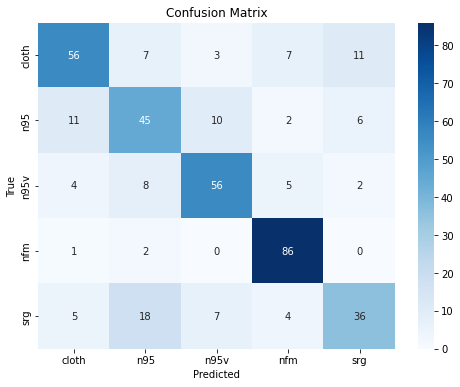

In [1]:
import os
import cv2
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# Load images and labels
data_path = "train/"
categories = os.listdir(data_path)
labels = []
images = []

# Load MobileNetV2 model for feature extraction
mobilenet_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(100, 100, 3))

for category in categories:
    folder_path = os.path.join(data_path, category)
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (100, 100))
        img = preprocess_input(img)
        img = np.expand_dims(img, axis=0)
        features = mobilenet_model.predict(img)
        images.append(features.flatten())
        labels.append(category)

# Convert images and labels to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Create and train the KNN model
knn_model = KNeighborsClassifier()

# Define a parameter grid to search
param_grid = {'n_neighbors': [3, 5, 7, 9]}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)

# Use the best model found by GridSearchCV
best_knn_model = grid_search.best_estimator_

# Save the best trained KNN model
model_save_path = "knn_model2.pkl"
joblib.dump(best_knn_model, model_save_path)
print(f"Best model saved at: {model_save_path}")

# Make predictions on the test set
y_pred = best_knn_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Visualize confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



In [9]:
# Visualize a few images from each class
num_classes_to_visualize = min(len(categories), 5)
plt.figure(figsize=(12, 8))
for i, category in enumerate(categories[:num_classes_to_visualize]):
    class_indices = np.where(y_test == category)[0][:5]
    for j, img_index in enumerate(class_indices):
        original_img = X_test[img_index].reshape((84, 84, 3))
        decoded_img = original_img / (2.0 + 0.5)  # Reverse normalization
        plt.subplot(num_classes_to_visualize, 5, i * 5 + j + 1)
        plt.imshow(decoded_img)
        plt.title(category)
        plt.axis('off')
plt.tight_layout()
plt.show()

ValueError: cannot reshape array of size 20480 into shape (84,84,3)

<Figure size 864x576 with 0 Axes>

In [3]:
import os
import cv2
import numpy as np
import joblib
import matplotlib.pyplot as plt
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions

# Load the trained KNN model
model_path = "knn_model.pkl"
knn_model = joblib.load(model_path)

# Load MobileNetV2 model for feature extraction
mobilenet_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(100, 100, 3))
2
# Directory containing subfolders with images
root_dir = "test/"

# Function to preprocess and predict the class of an image
def predict_class(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error reading image: {image_path}")
        return None
    img = cv2.resize(img, (100, 100))
    img = preprocess_input(img)  # Preprocess image for MobileNetV2
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    features = mobilenet_model.predict(img)
    flattened_features = features.flatten()
    prediction = knn_model.predict([flattened_features])
    return prediction[0]

# Test the model on all images in subfolders
predictions = []
true_labels = []
for class_folder in os.listdir(root_dir):
    class_folder_path = os.path.join(root_dir, class_folder)
    if os.path.isdir(class_folder_path):
        for img_name in os.listdir(class_folder_path):
            img_path = os.path.join(class_folder_path, img_name)
            if os.path.isfile(img_path):  # Check if it's a file
                true_labels.append(class_folder)
                prediction = predict_class(img_path)
                if prediction is not None:
                    predictions.append(prediction)

# Visualize predictions and save the figure
plt.figure(figsize=(12, 8))
for i, img_path in enumerate(os.listdir(root_dir)):
    img_path = os.path.join(root_dir, img_path)
    if os.path.isfile(img_path):  # Check if it's a file
        img = cv2.imread(img_path)
        if img is None:
            print(f"Error reading image: {img_path}")
            continue
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for displaying with matplotlib
        plt.subplot(2, len(os.listdir(root_dir)) // 2, i + 1)
        plt.imshow(img)
        plt.title(f"True: {true_labels[i]}\nPrediction: {predictions[i]}")
        plt.axis('off')

plt.tight_layout()
plt.savefig("predictions_plot.jpg")  # Save the figure as an image file
plt.close()

# Open the saved image file using the default image viewer
os.system("xdg-open predictions_plot.jpg")

1/1 [==============================] - 0s 45ms/step


0

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 21ms/step


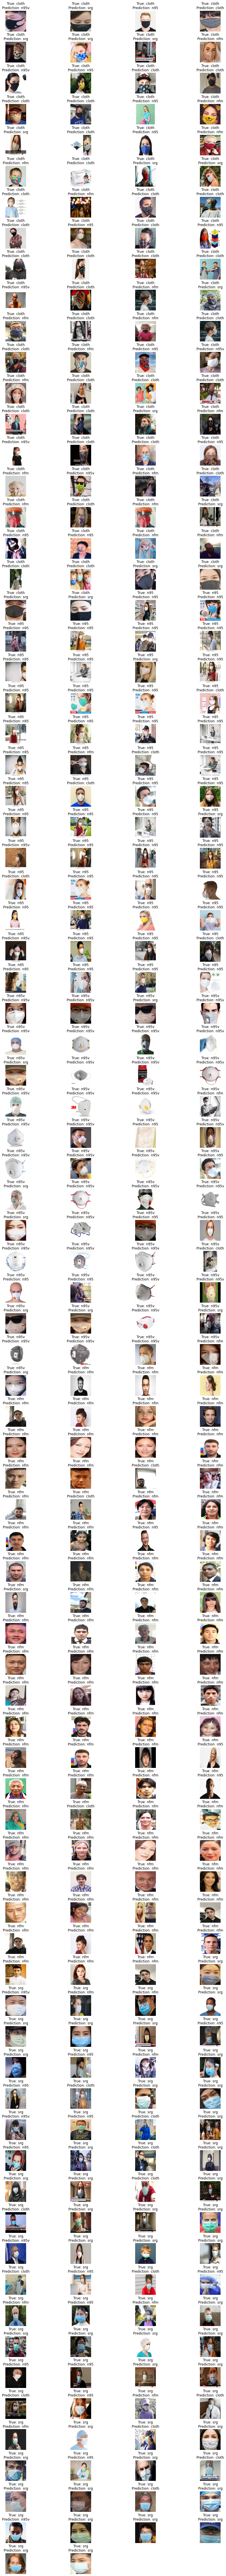

In [3]:
import os
import cv2
import numpy as np
import joblib
import matplotlib.pyplot as plt
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions

# Load the trained KNN model
model_path = "knn_model2.pkl"
knn_model = joblib.load(model_path)

# Load MobileNetV2 model for feature extraction
mobilenet_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(100, 100, 3))

# Directory containing subfolders with images
root_dir = "test/"

# Function to preprocess and predict the class of an image
def predict_class(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error reading image: {image_path}")
        return None
    img = cv2.resize(img, (100, 100))
    img = preprocess_input(img)  # Preprocess image for MobileNetV2
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    features = mobilenet_model.predict(img)
    flattened_features = features.flatten()
    prediction = knn_model.predict([flattened_features])
    return prediction[0]

# Test the model on all images in subfolders
predictions = []
true_labels = []
images = []
for class_folder in os.listdir(root_dir):
    class_folder_path = os.path.join(root_dir, class_folder)
    if os.path.isdir(class_folder_path):
        for img_name in os.listdir(class_folder_path):
            img_path = os.path.join(class_folder_path, img_name)
            if os.path.isfile(img_path):  # Check if it's a file
                true_labels.append(class_folder)
                prediction = predict_class(img_path)
                if prediction is not None:
                    predictions.append(prediction)
                    images.append(cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB))

# Visualize predictions inline
num_images = len(images)
num_cols = min(4, num_images)  # Maximum 4 columns
num_rows = -(-num_images // num_cols)  # Ceiling division to determine the number of rows

plt.figure(figsize=(15, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(images[i])
    plt.title(f"True: {true_labels[i]}\nPrediction: {predictions[i]}")
    plt.axis('off')

plt.subplots_adjust(wspace=0.5, hspace=0.5)  # Adjust spacing manually
plt.show()